In [1]:
!pip install imblearn
!pip install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import History

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [6]:
from sklearn.metrics import confusion_matrix

In [176]:
import src.profit as f

In [11]:
data = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

In [12]:
new_data = data.copy()

In [13]:
data.info() # show each columns name and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [14]:
data.describe() # basic information of the data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
new_data.y[new_data.y == 'yes'] = 1 # convery label column to int
new_data.y[new_data.y == 'no'] = 0 # convery label column to int

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


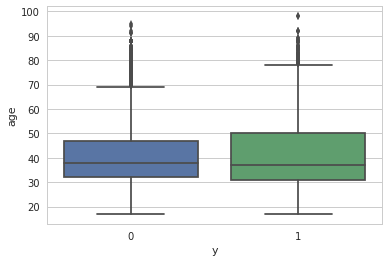

In [18]:
sns.set(style='whitegrid')
sns.boxplot(y='age',x='y',data=new_data)

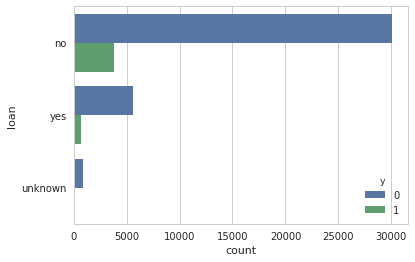

In [19]:
sns.set(style='whitegrid')
sns.countplot(y='loan',hue='y',data=new_data)

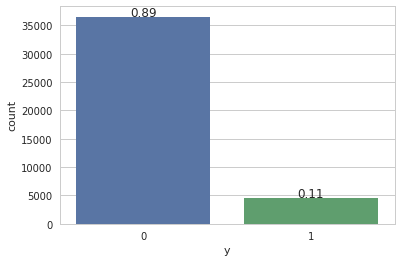

In [20]:
sns.set(style='whitegrid')
ax = sns.countplot(x='y', data=new_data)
total= float(len(new_data.y))
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+20,'{:1.2f}'.format(height/total),ha='center')
plt.show()

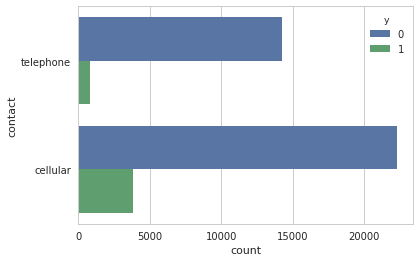

In [21]:
sns.countplot(y='contact',hue='y',data=new_data)

In [202]:
new_data.groupby(['contact','y']).count() # rate of accept or reject with different contact

age    job  marital  education  default  housing   loan  month  \
contact   y                                                                     
cellular  0  22291  22291    22291      22291    22291    22291  22291  22291   
          1   3853   3853     3853       3853     3853     3853   3853   3853   
telephone 0  14257  14257    14257      14257    14257    14257  14257  14257   
          1    787    787      787        787      787      787    787    787   

             day_of_week  duration  campaign  pdays  previous  poutcome  \
contact   y                                                               
cellular  0        22291     22291     22291  22291     22291     22291   
          1         3853      3853      3853   3853      3853      3853   
telephone 0        14257     14257     14257  14257     14257     14257   
          1          787       787       787    787       787       787   

             emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
contact   y                                                           
cellular  0         22291           22291          22291      22291   
          1          3853            3853           3853       3853   
telephone 0         14257           14257          14257      14257   
          1           787             787            787        787   

             nr.employed  
contact   y               
cellular  0        22291  
          1         3853  
telephone 0        14257  
          1          787

In [22]:
new_data.y[new_data.y == 'yes'] = 1 # convery label column yes to 1
new_data.y[new_data.y == 'no'] = 0 # convery label column no to 0


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
new_data = new_data.astype({'y':'int64'})

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [25]:
new_data_df = pd.get_dummies(new_data, columns=['job','marital','education','day_of_week','default','housing','loan',
                                 'contact','month','poutcome'], drop_first=True)

In [26]:
new_X = new_data_df.loc[:,  new_data_df.columns != 'y'] # select X
# new_X = new_X.drop(['duration'],axis=1)

In [27]:
new_y = new_data_df.y

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0


## train test split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(new_X.values,new_y.values,test_size=0.07,random_state=13) # doing train test split

##  resample

In [31]:
sm = SMOTE(sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [32]:
new_X_train,new_X_test,new_y_train,new_y_test = train_test_split(X_train_res,y_train_res,test_size=0.3,random_state=15)

In [33]:
np.unique(new_y_train, return_counts = True) # checking if data is balance now

(array([0, 1]), array([23786, 23760]))

## Logistic Regression

In [34]:
logistic_model = LogisticRegression(max_iter= 100,random_state=0)

In [35]:
logistic_model.fit(new_X_train,new_y_train)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logistic_model.score(new_X_test,new_y_test)

0.865001472175876

In [37]:
logistic_model.score(X_test,y_test)

0.852635228848821

In [46]:
f.accuracy_(logistic_model,X_test,y_test)

accuracy:0.852635228848821
r2:-0.5905209776961122
f1:0.5512143611404434


In [55]:
f.get_confusion_matrix(logistic_model,X_test,y_test,threshold=0.5)
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 261   37]
 [ 388 2198]]
precision:0.40215716486902925, recall:0.8758389261744967
total profit:2930


## Random Forest

In [56]:
rf = RandomForestClassifier(n_estimators = 5000, max_depth = 6, min_samples_split = 3, random_state=0)

In [57]:
rf.fit(new_X_train,new_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
f.accuracy_(rf,X_test,y_test)

accuracy:0.8682385575589459
r2:-0.4221128741753475
f1:0.5308641975308642


In [61]:
f.get_confusion_matrix(rf,X_test,y_test,threshold=0.5) 
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 215   83]
 [ 297 2289]]
precision:0.419921875, recall:0.7214765100671141
total profit:-2160


In [62]:
f.accuracy_(rf,new_X_test,new_y_test) # test validation ,not actual result

accuracy:0.9222200412209245
r2:0.6888796584157257
f1:0.9245274034569783


In [63]:
f.get_confusion_matrix(rf,new_X_test,new_y_test,threshold=0.5)# test validation ,not actual result

[[9708  494]
 [1091 9085]]
precision:0.8989721270488008, recall:0.9515781219368751
total profit:597430


## Gradient Boosting

In [64]:
gdb_model = GradientBoostingClassifier(learning_rate = 0.05,random_state=0)

In [65]:
gdb_model.fit(new_X_train,new_y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
f.accuracy_(gdb_model,X_test,y_test)

accuracy:0.8928571428571429
r2:-0.15640231084258516
f1:0.5939553219448095


In [69]:
f.get_confusion_matrix(gdb_model,X_test,y_test,threshold=0.5)
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 226   72]
 [ 237 2349]]
precision:0.48812095032397407, recall:0.7583892617449665
total profit:1510


In [70]:
f.accuracy_(gdb_model,new_X_test,new_y_test)# test validation ,not actual result

accuracy:0.9351751889292375
r2:0.7407003336070497
f1:0.9368214644411497


In [71]:
f.get_confusion_matrix(gdb_model,new_X_test,new_y_test,threshold=0.5)# test validation  ,not actual result
# confusion matrix
#([tp,fn],
#[fp,tn])

[[9794  408]
 [ 913 9263]]
precision:0.9147286821705426, recall:0.9600078415996863
total profit:617390


## XGboosting

In [72]:
xgb_model = XGBClassifier(colsample_bytree=0.7,
 learning_rate=0.05,
 max_depth=7,
 min_child_weight=11,
 n_estimators=1000,
 seed=1337,
 subsample=0.8)

In [73]:
xgb_model.fit(new_X_train,new_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=11, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1337, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=1337, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
f.accuracy_(xgb_model,X_test,y_test)

accuracy:0.9167822468793343
r2:0.10182344788925424
f1:0.5714285714285714


In [75]:
f.get_confusion_matrix(xgb_model,X_test,y_test,threshold=0.5)
# confusion matrix
#([tp,fn],
#[fp,tn])

[[ 160  138]
 [ 102 2484]]
precision:0.6106870229007634, recall:0.5369127516778524
total profit:-5660


In [76]:
f.accuracy_(xgb_model,new_X_test,new_y_test)# test validation, ,not actual result

accuracy:0.9507802532142506
r2:0.8031206923602352
f1:0.9504177171387612


In [77]:
f.get_confusion_matrix(xgb_model,new_X_test,new_y_test,threshold=0.5)# test validation, ,not actual result
# confusion matrix
#([tp,fn],
#[fp,tn])

[[9613  589]
 [ 414 9762]]
precision:0.958711479006682, recall:0.9422662223093511
total profit:601590


## feature importance for XG boosting

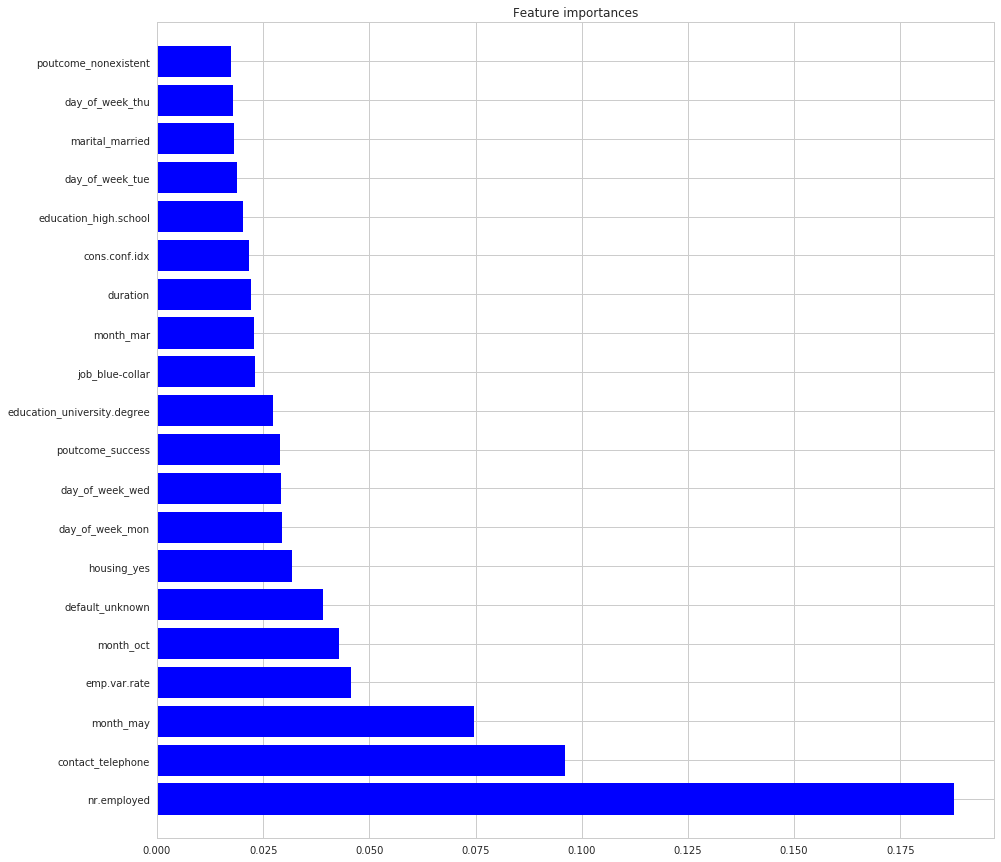

In [80]:
f.feat_imp(new_X, xgb_model, 20)


## Neural Network

In [272]:
nn_model = tf.keras.models.Sequential()

In [273]:
nn_model.add(keras.layers.Dense(units=100, input_dim=53,activation='relu'))
nn_model.add(Dropout(0.2))
# nn_model.add(keras.layers.Dense(units=60, activation='relu'))
# nn_model.add(keras.layers.Dense(units=60, activation='relu'))
# nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=50, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=50, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=20, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(keras.layers.Dense(units=15, activation='relu'))


In [274]:
nn_model.add(keras.layers.Dense(units=1,activation='sigmoid'))

In [275]:
ops = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(loss='binary_crossentropy',
              optimizer=ops,
                metrics=[tf.keras.metrics.Recall()])

In [276]:
history = History()

In [277]:
his =nn_model.fit(new_X_train, new_y_train, epochs=50, batch_size=16,validation_data = (new_X_test, new_y_test),
                     callbacks=[history])


Train on 47546 samples, validate on 20378 samples
Epoch 1/50
47546/47546 [==============================] - 20s 428us/sample - loss: 8.9660 - recall_12: 0.5390 - val_loss: 0.6979 - val_recall_12: 0.7735
Epoch 2/50
47546/47546 [==============================] - 19s 400us/sample - loss: 0.9261 - recall_12: 0.5672 - val_loss: 0.6911 - val_recall_12: 0.0000e+00
Epoch 3/50
47546/47546 [==============================] - 19s 401us/sample - loss: 0.7472 - recall_12: 0.5424 - val_loss: 0.6810 - val_recall_12: 0.6063
Epoch 4/50
47546/47546 [==============================] - 19s 404us/sample - loss: 0.7006 - recall_12: 0.5545 - val_loss: 0.6224 - val_recall_12: 0.6708
Epoch 5/50
47546/47546 [==============================] - 19s 401us/sample - loss: 0.6429 - recall_12: 0.6168 - val_loss: 0.5189 - val_recall_12: 0.6660
Epoch 6/50
47546/47546 [==============================] - 19s 399us/sample - loss: 0.5642 - recall_12: 0.6738 - val_loss: 0.4856 - val_recall_12: 0.7275
Epoch 7/50
47546/47546 [====

In [ ]:
print(history.history.keys()) # print out names on history

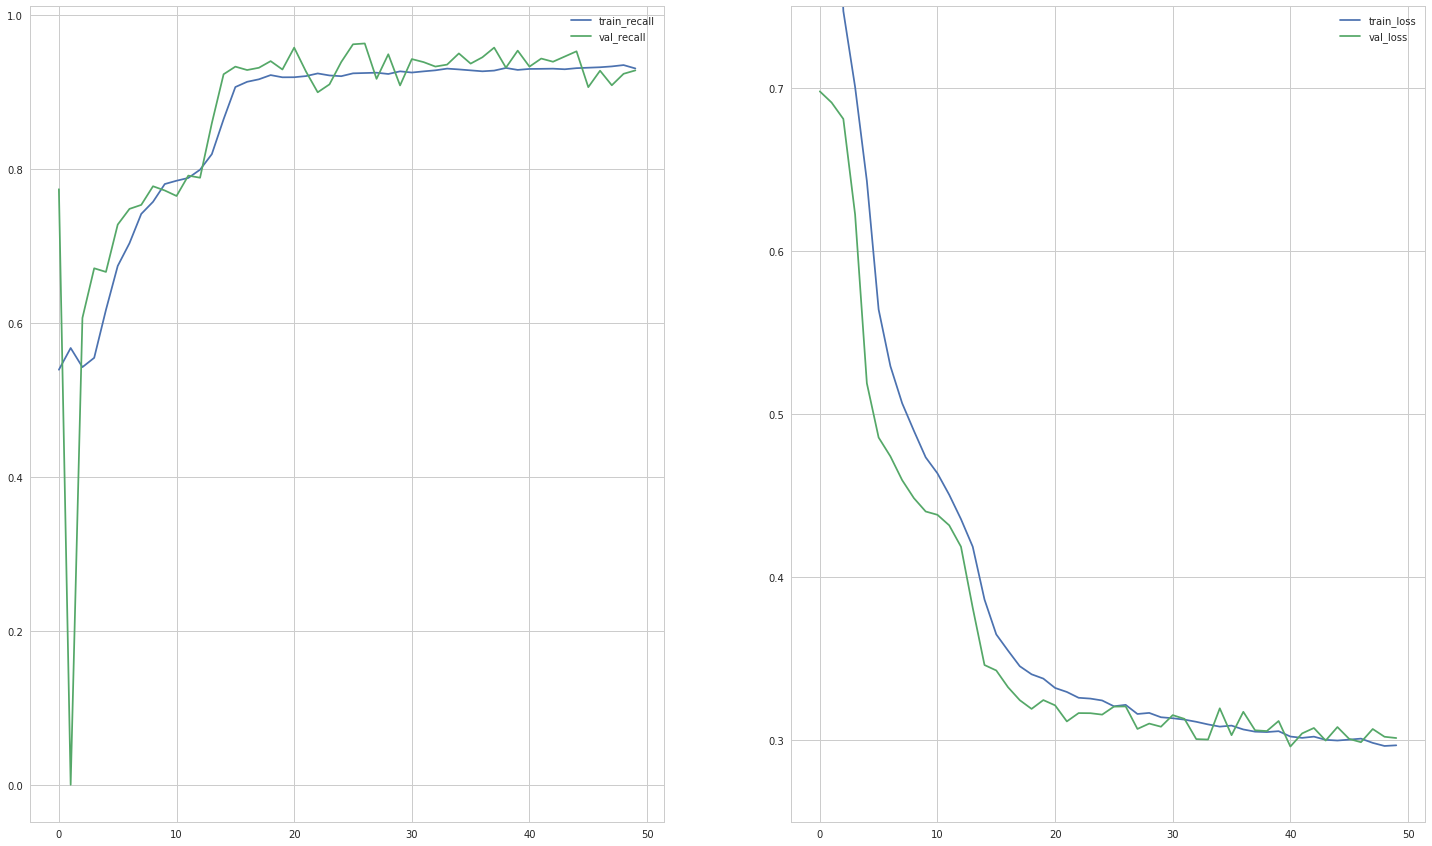

In [281]:
# this is history of validation loss.
# testing if neural network model is working correcting.
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
# everytime you run the neural network model, the history add up. such as (recall,recall_1,recall_2)
train_recall =history.history['recall'] # need to follow the previous cell output to change string
val_recall = history.history['val_recall'] #need to follow the previous cell output to change string
xc         = range(50)

fig,ax = plt.subplots(1,2,figsize=(25,15))

ax[0].plot(xc, train_recall,label='train_recall')
ax[0].plot(xc, val_recall,label='val_recall')
ax[1].plot(xc, train_loss,label='train_loss')
ax[1].plot(xc, val_loss,label='val_loss')

ax[1].set_ylim([0.25,0.75])

ax[0].legend()
ax[1].legend()



In [ ]:
nn_model.summary()

In [252]:
f.nn_get_confusion_matrix(nn_model,X_test,y_test,threshold=0.5)

[[ 290    8]
 [ 600 1986]]
precision:0.3258426966292135, recall:0.9731543624161074
total profit:1500


In [285]:
print(history.history.keys())

dict_keys(['loss', 'recall_12', 'val_loss', 'val_recall_12'])


## Cost Benefit matrix

In [195]:
cost_benefit_1 = np.array([[70, -100], [-30, 0]])
# cost benefit matrix
#([tp,fn],
#[fp,tn])
cost_benefit_1

array([[  70, -100],
       [ -30,    0]])

# Profit Curve

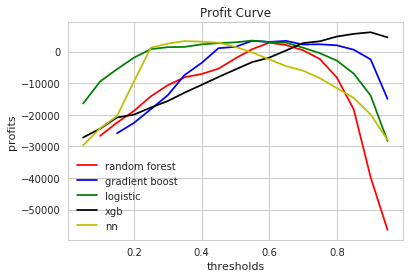

In [253]:
f.profit_curve(rf,gdb_model,logistic_model,xgb_model,nn_model,X_test,y_test)

# Result

In [182]:
f.find_best_profit(xgb_model,X_test,y_test)
# result for xgboosting with profit of $6130 threshold 0.9

(6130, 0.9000000000000002)

In [286]:
f.find_best_profit_nn(nn_model,X_test,y_test)
# result for neural network with profit of $3960 threshold 0.45

(3960, 0.45000000000000007)

In [184]:
f.find_best_profit(rf,X_test,y_test)
# result for random forest with profit of $2830 threshold 0.6

(2830, 0.6000000000000002)

In [186]:
f.find_best_profit(gdb_model,X_test,y_test)
# result for gradient boosting with profit of $3400 threshold 0.549

(3400, 0.5499999999999999)

In [187]:
f.find_best_profit(logistic_model,X_test,y_test)
# result for logistic regession with profit of $3490 threshold 0.549

(3490, 0.5499999999999999)

A false negative is a test result that indicates a person does not have a disease or condition when the person actually does have it, according to the National Institute of Health (NIH). False negative test results can occur in many different medical tests, from tests for pregnancy , tuberculosis or Lyme disease to tests for the presence of drugs or alcohol in the body.

Correspondingly, a false-positive test result indicates that a person has a specific disease or condition when the person actually does not have it. An example of a false positive is when a particular test designed to detect melanoma, a type of skin cancer , tests positive for the disease, even though the person does not have cancer.

## ROC curve

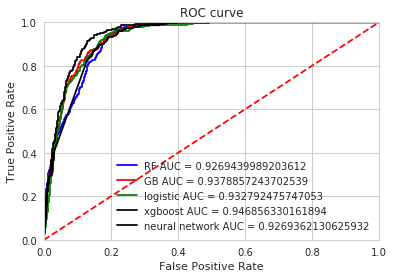

In [193]:
f.roc_curve_(rf,gdb_model,logistic_model,xgb_model,nn_model,X_test,y_test)

## grid search for best model(XGBoosting)

In [131]:
from sklearn.model_selection import cross_validate

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
from sklearn.grid_Search import GridSearchCV

In [168]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': (6,7,8),
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'seed': [1337]}

In [169]:
clf = GridSearchCV(xgb_model,parameters,n_jobs=5,cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='f1',
                   verbose=2, refit=True)

In [170]:
clf.fit(new_X_train,new_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed: 14.8min finished


[00:47:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.05, 0.1], 'max_depth': (6, 7, 8),
                      

In [172]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 11,
 'n_estimators': 1000,
 'nthread': 4,
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}